In [22]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

#data_sample = pd.read_csv('data/train_sample.csv')
#data = pd.read_csv('data/train.csv', chunksize=1000000)
#print data_sample.head
#print data
#for chunk in pd.read_csv('data/train.csv', chunksize = 1000000):
fraud = 0
not_fraud = 1
for chunk in pd.read_csv('data/train.csv', chunksize = 1000000):
    fraud += data[data['is_attributed']==0].shape[0]
    not_fraud += data[data['is_attributed']==1].shape[0]
print fraud
print not_fraud

184686795
313206


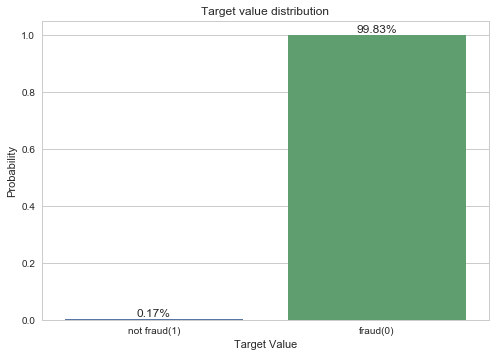

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

prob_not_fraud = float(not_fraud)/float(not_fraud+fraud)
prob_fraud = float(fraud)/float(not_fraud+fraud)
ax = sns.barplot(x=['not fraud(1)', 'fraud(0)'], y=[prob_not_fraud, prob_fraud])
ax.set(xlabel='Target Value', ylabel='Probability', title='Target value distribution')
for p, uniq in zip(ax.patches, [prob_not_fraud, prob_fraud]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center") 